In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [9]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)     
plt.rcParams['font.size'] = 15  

In [23]:
info = pd.read_excel('서울시_자치구별_의료기관(2019-2022).xlsx')
info.set_index('자치구별(2)', inplace= True)
info

,자치구별(1),2019,2020,2021,2022
자치구별(2),,,,,
자치구별(2),자치구별(1),계,계,계,계
자치구별(2),자치구별(1),소계,소계,소계,소계
자치구별(2),자치구별(1),병원수,병원수,병원수,병원수
소계,서울시,17610,17916,18261,18556
종로구,NaN,494,494,489,480
중구,NaN,560,572,572,579
용산구,NaN,307,310,323,327
성동구,NaN,444,456,460,466
광진구,NaN,552,552,559,564


In [24]:
info = info[info.index != '자치구별(2)']
info.drop(columns='자치구별(1)', inplace=True)
info.drop(index='소계', inplace=True)
info

C:\Users\ChoYW\AppData\Local\Temp\ipykernel_9856\1522184476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info.drop(columns='자치구별(1)', inplace=True)
C:\Users\ChoYW\AppData\Local\Temp\ipykernel_9856\1522184476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info.drop(index='소계', inplace=True)


,2019,2020,2021,2022
자치구별(2),,,,
종로구,494,494,489,480
중구,560,572,572,579
용산구,307,310,323,327
성동구,444,456,460,466
광진구,552,552,559,564
동대문구,607,586,596,597
중랑구,511,531,535,547
성북구,528,540,533,541
강북구,461,466,467,466


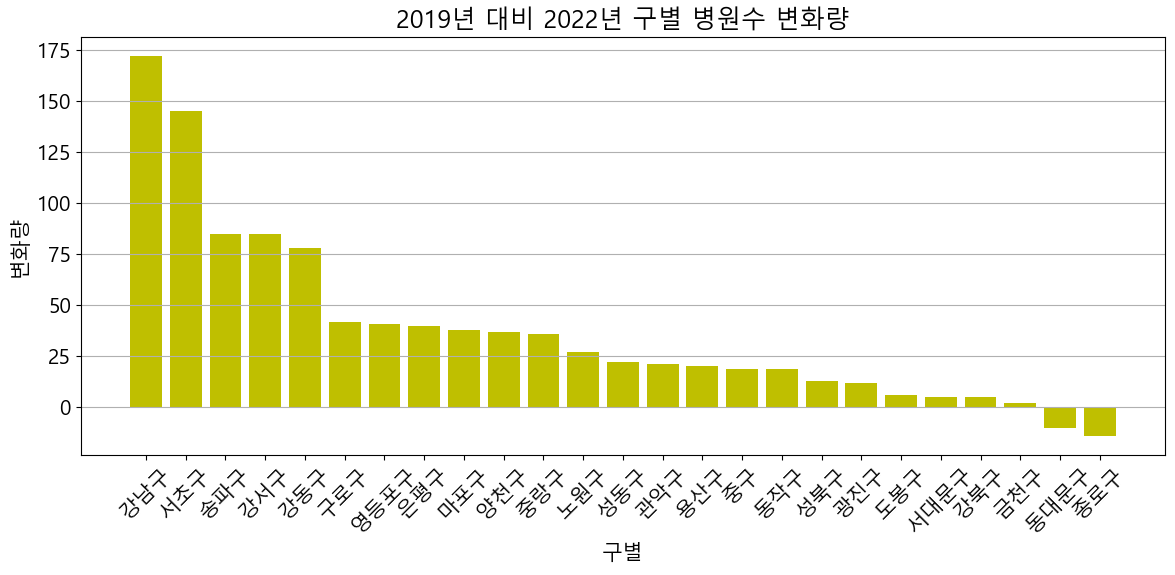

In [25]:
df = pd.DataFrame(info)

#df.set_index('자치구별(2)', inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')

df['변화량'] = (df['2022'] - df['2019'])

df_sorted = df.sort_values(by='변화량', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted.index, df_sorted['변화량'], color='y')
plt.title('2019년 대비 2022년 구별 병원수 변화량')
plt.xlabel('구별')
plt.ylabel('변화량')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

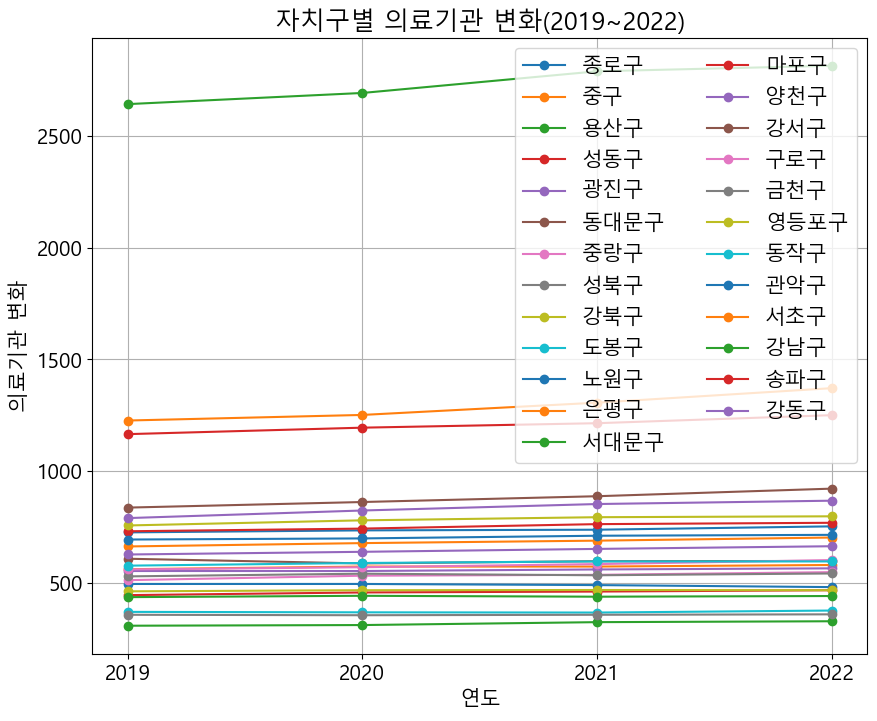

In [57]:
def change(x):
    last_year = list(df.columns).index(x)-1
    return np.array(df[x])/np.array(df.iloc[:,last_year]) -1 

delta_df = pd.DataFrame(df)
delta_df.drop('변화량', axis=1, inplace=True)
for i in df.columns[4:-1]:
    delta_df[i] = change(i)
plt.figure(figsize=(10, 8))

# DF의 인덱스와 값으로 라인그래프
for index, row in delta_df.iterrows():
    plt.plot(delta_df.columns, row, marker='o', label=index)

plt.title('자치구별 의료기관 변화(2019~2022)')
plt.xlabel('연도')
plt.ylabel('의료기관 변화')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.savefig('자치구별 의료기관 변화(2019~2022)', bbox_inches='tight')
plt.show()

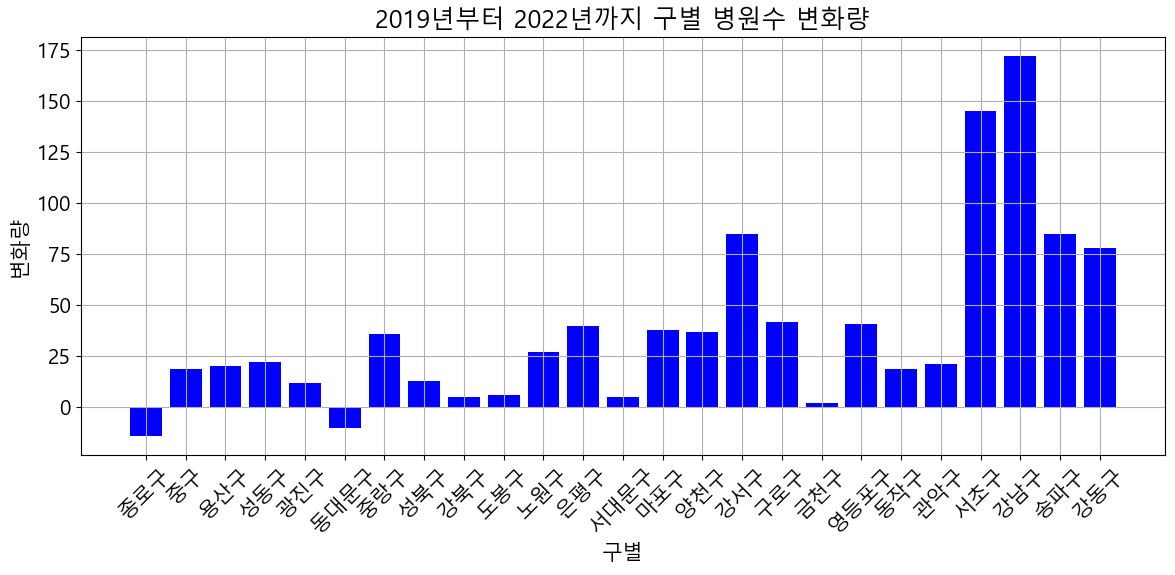

In [41]:
df = pd.DataFrame(info)
#df.set_index('자치구별', inplace=True)
df['변화량'] = df['2022'] - df['2019']

plt.figure(figsize=(12, 6))
plt.bar(df.index, df['변화량'], color='b')
plt.title('2019년부터 2022년까지 구별 병원수 변화량')
plt.xlabel('구별')
plt.ylabel('변화량')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

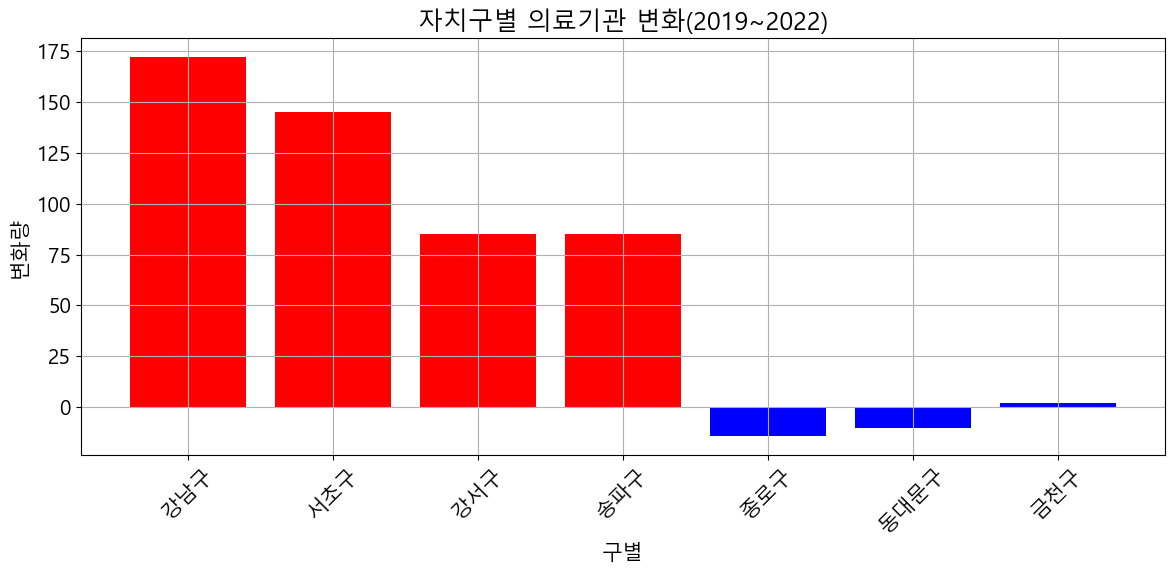

In [56]:
df['변화량'] = df['2022'] - df['2019']

# 변화량을 숫자형으로 변환
df['변화량'] = pd.to_numeric(df['변화량'])

# 변화량 상위 3개와 하위 3개 추출
top_3 = df.nlargest(3, '변화량', keep='all')
bottom_3 = df.nsmallest(3, '변화량', keep='all')
top_bottom_df = pd.concat([top_3, bottom_3])

top_bottom_df['색상'] = ['red'] * len(top_3) + ['blue'] * len(bottom_3)

# 상위 3개와 하위 3개를 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_bottom_df.index, top_bottom_df['변화량'], color=top_bottom_df['색상'])
plt.title('자치구별 의료기관 변화(2019~2022)')
plt.xlabel('구별')
plt.ylabel('변화량')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('자치구별 의료기관 변화(2019~2022)', bbox_inches='tight')
plt.show()